<a href="https://colab.research.google.com/github/HamzaAnjum15/StatTrack-Football/blob/main/Ronaldo%20UCL%20stats%20Comparison/PassesRonaldoMadrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsbombpy
from statsbombpy import sb
!pip install mplsoccer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 758.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.0 MB/s eta 0:00:00


In [2]:
from urllib.request import urlopen
!pip install highlight_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text

from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen

In [4]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['text.color'] = '#c7d5cc'  # set the default text color

# get event dataframe for game 7478
parser = Sbopen()
df, related, freeze, tactics = parser.event(18245)

In [5]:
mask_team1 = (df.type_name == 'Pass') & (df.player_name == 'Cristiano Ronaldo dos Santos Aveiro')


In [6]:
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

In [7]:
df_pass.head()

,x,y,end_x,end_y,outcome_name
58,64.5,11.1,54.2,5.6,NaN
106,112.0,6.2,97.3,30.2,NaN
273,52.5,7.0,26.9,8.0,NaN
596,78.1,4.6,78.4,11.0,NaN
794,96.2,75.3,85.8,74.3,NaN


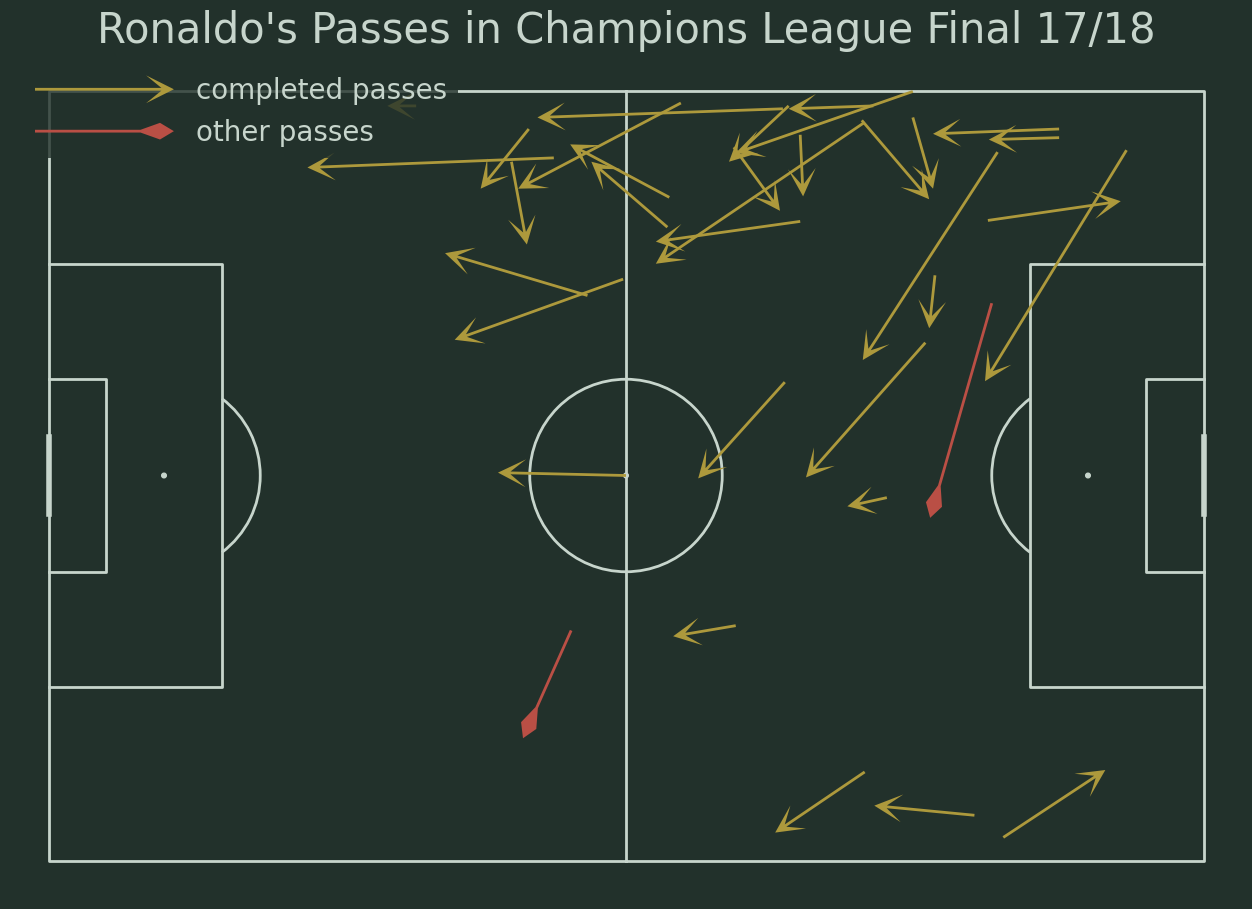

In [15]:
# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
             df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the other passes
pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
             df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

# Set up the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

ax_title = ax.set_title(f'Ronaldo\'s Passes in Champions League Final 17/18', fontsize=30)
plt.savefig('RonaldoPasses1718.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
from google.colab import files
files.download('RonaldoPasses1718.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>